## Battle of Neighborhood Bangalore

In [1]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import folium
import requests
import matplotlib.pyplot as plt

In [2]:
CLIENT_ID = 'G23IEOBU4RYAGWD2X2OJTQ1YT0NEBQHRECB4AOO13F4QOENN' # your Foursquare ID
CLIENT_SECRET = 'NV4D1VZJCSTUY151NAEJQMDIXC3TLXMYSNGA2POXWPY3FQZ1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G23IEOBU4RYAGWD2X2OJTQ1YT0NEBQHRECB4AOO13F4QOENN
CLIENT_SECRET:NV4D1VZJCSTUY151NAEJQMDIXC3TLXMYSNGA2POXWPY3FQZ1


reading data that we acquire from the Kaggle datasets

In [3]:
bng_data=pd.read_csv('bng_neighborhoods.csv')
bng_data.drop('Unnamed: 0',axis=1,inplace=True)
columns=['City','Neighborhood','Latitude','Longitude']
bng_data=bng_data.loc[:,columns]
bng_data.head()

,City,Neighborhood,Latitude,Longitude
0,Bangalore,Agram,45.813177,15.977048
1,Bangalore,Amruthahalli,13.066513,77.596624
2,Bangalore,Attur,11.663711,78.533551
3,Bangalore,Banaswadi,13.014162,77.651854
4,Bangalore,Bellandur,58.235358,26.683116


let's visualize all the available neighbourhoods of Bangalore

In [4]:
bng_lat=12.9716
bng_lng=77.5946
bn_Map=folium.Map(location=[bng_lat,bng_lng],zoom_starts=15)
for lat,lng,neigh in zip(bng_data['Latitude'],bng_data['Longitude'],bng_data['Neighborhood']):
    folium.CircleMarker(location=[lat,lng],fill=True,popup=neigh,color='blue',fill_color='#3186cc',fill_opacity=0.8,radius=5).add_to(bn_Map)
bn_Map

### function to return all the categories of venues

In [5]:
def getnearbyvenues(row):
    try:
        category_list=row['categories']
    except:
        category_list=row['venue.categories']
    if len(category_list)==0:
        return None
    else:
        return category_list[0]['name']

In [6]:
def getdata(name,lat,lng,radius):
    print(name)
    url='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius)
    result=requests.get(url).json()['response']['groups'][0]['items']
    nearby_venue=json_normalize(result)
    nearby_venue.columns=[i.split('.')[-1] for i in nearby_venue.columns]
    try:
        nearby_venue['categories']=nearby_venue.apply(getnearbyvenues,axis=1)
    except:
        return None
    neigh_data=pd.DataFrame({'Neighborhood':name,'latitude':lat,'longitude':lng,'Name':nearby_venue['name'],'Categories':nearby_venue['categories'],'venue_latitude':nearby_venue['lat'],'venue_longitude':nearby_venue['lng']})
    l.append(neigh_data)
    return l


Getting venue details using foursquare API by passing appropriate arguments

In [8]:
l=[]
for name,lat,lng in zip(bng_data.Neighborhood,bng_data.Latitude,bng_data.Longitude):
    test=getdata(name,lat,lng,500)

Agram
Amruthahalli
Attur
Banaswadi
Bellandur
Bhattarahalli
Bidrahalli
Byatarayanapura
Devanagundi
Devasandra
Doddagubbi
Doddanekkundi
Domlur
EPIP
Fraser Town
Gunjur
HighCourt
Hoodi
Horamavu
Indiranagar S.O (Bangalore)
Jakkur
Kadugodi
Kalkunte
Kannamangala
Kodigehalli
Kothanur
Krishnarajapuram
Kundalahalli
Lingarajapuram
Mahadevapura
Medimallasandra
Mundur
Museum Road
NAL
Panathur
Rajanakunte
Sadashivanagar
Samethanahalli
Singanayakanahalli
Vasanthanagar
Venkateshapura
Vimanapura
Virgonagar
Whitefield
Yelahanka
Adugodi
Agara
Anjanapura
Banashankari
Bannerghatta
Basavanagudi H.O
Begur
Bolare
Bommanahalli S.O (Bangalore)
Chandapura
Chandapura
Chickpet
Chikkalasandra
Deepanjalinagar
Doddakallasandra
Girinagar S.O (Bangalore)
Gottigere
Haragadde
Hennagara
Hulimangala
Hulimavu
Hulimavu
Huskur
Jayanagar H.O
Jigani
Kalkere
Kallubalu
Kathriguppe
Kengeri
Konanakunte
Koramangala
Kumbalagodu
Madivala
Mallathahalli
Mavalli
Nayandahalli
Ragihalli
Ramohalli
Sakalavara
Shanthinagar
Singasandra
Subrama

Converting list to a new Data Frame which acts as main source for our analysis

In [7]:
p=pd.DataFrame()

In [ ]:
for i in range(len(l)):
    p=p.append(l[i],ignore_index=True)

In [ ]:
p.columns=['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','venue','venue_categories','venue Latitude','venue longitude']

In [ ]:
#moving p data to new file
p_df=p.to_csv("bng_json_df.csv")

In [7]:
#reading p_df
p_df=pd.read_csv("bng_json_df.csv")
p_df.drop('Unnamed: 0',axis=1,inplace=True)
p=p_df
p.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,venue,venue_categories,venue Latitude,venue longitude
0,Agram,45.813177,15.977048,Amélie,Dessert Shop,45.813842,15.979011
1,Agram,45.813177,15.977048,Corner bar,Bar,45.812930,15.979440
2,Agram,45.813177,15.977048,Trg bana Josipa Jelačića,Plaza,45.813032,15.976868
3,Agram,45.813177,15.977048,Tržnica Dolac,Farmers Market,45.814070,15.977261
4,Agram,45.813177,15.977048,Cremme Zagreb,Dessert Shop,45.814987,15.976296


In [8]:
p['Neighborhood'].unique().shape

(102,)

In [9]:
p.shape

(597, 7)

In [10]:
len(p['venue_categories'].unique())

151

In [11]:
from sklearn.cluster import KMeans

analyze count of neighbourhoods

In [12]:
cnt=p.groupby('Neighborhood').count()
cnt

,Neighborhood Latitude,Neighborhood Longitude,venue,venue_categories,venue Latitude,venue longitude
Neighborhood,,,,,,
Achitnagar,3,3,3,3,3,3
Adugodi,4,4,4,4,4,4
Agram,30,30,30,30,30,30
Akkur,16,16,16,16,16,16
Alahalli,1,1,1,1,1,1
...,...,...,...,...,...,...
Virgonagar,2,2,2,2,2,2
Whitefield,7,7,7,7,7,7
Yelachenahalli,4,4,4,4,4,4


In [15]:
print("There are {} unique categories".format(len(p['Neighborhood'].unique())))

There are 102 unique categories


## Analysing each Neighborhood

 *One Hot Encoding*

In [16]:
bng_onehot=pd.get_dummies(p[['venue_categories']])
bng_onehot['Neighborhood']=p['Neighborhood']
filtered_columns=[bng_onehot.columns[-1]]+list(bng_onehot.columns[:-1])
bng_onehot=bng_onehot[filtered_columns]
bng_onehot.head()

,Neighborhood,venue_categories_ATM,venue_categories_Accessories Store,venue_categories_Andhra Restaurant,venue_categories_Arcade,venue_categories_Arts & Entertainment,venue_categories_Asian Restaurant,venue_categories_Athletics & Sports,venue_categories_Auto Garage,venue_categories_BBQ Joint,...,venue_categories_Trail,venue_categories_Train Station,venue_categories_Travel & Transport,venue_categories_Turkish Coffeehouse,venue_categories_Udupi Restaurant,venue_categories_Vegetarian / Vegan Restaurant,venue_categories_Vietnamese Restaurant,venue_categories_Wine Shop,venue_categories_Women's Store,venue_categories_Yoga Studio
0,Agram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
bng_grouped=bng_onehot.groupby('Neighborhood').mean().reset_index()
bng_grouped.columns=[i.split('_')[-1] for i in bng_grouped.columns]

In [18]:
bng_grouped

,Neighborhood,ATM,Accessories Store,Andhra Restaurant,Arcade,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,...,Trail,Train Station,Travel & Transport,Turkish Coffeehouse,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Achitnagar,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adugodi,0.0,0.0,0.0,0.0,0.0,0.000000,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Agram,0.0,0.0,0.0,0.0,0.0,0.033333,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Akkur,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alahalli,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Virgonagar,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,Whitefield,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,Yelachenahalli,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,Yelahanka,0.2,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0


In [24]:
bng_grouped[['Neighborhood','Italian Restaurant']]


,Neighborhood,Italian Restaurant
0,Achitnagar,0.000000
1,Adugodi,0.000000
2,Agram,0.066667
3,Akkur,0.000000
4,Alahalli,0.000000
...,...,...
97,Virgonagar,0.000000
98,Whitefield,0.000000
99,Yelachenahalli,0.000000
100,Yelahanka,0.000000


In [25]:
bng_grouped.shape

(102, 152)

In [27]:
tt=bng_grouped[['Neighborhood','Italian Restaurant']]

In [28]:
optk=bng_grouped[['Italian Restaurant']]

#### Using Elbow technique finding optimum k Value

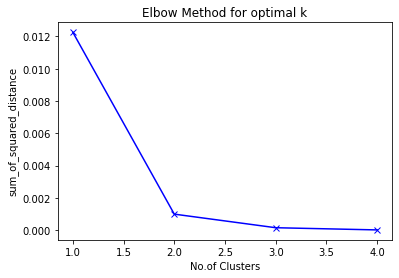

In [29]:
k=range(1,5)
sum_of_squared_dist=[]
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(optk)
    sum_of_squared_dist.append(km.inertia_)
plt.plot(k,sum_of_squared_dist,'bx-')
plt.xlabel("No.of Clusters")
plt.ylabel("sum_of_squared_distance")
plt.title('Elbow Method for optimal k')
plt.show()

In [30]:
km=KMeans(n_clusters=2)
train=km.fit(optk)

In [31]:
optk['labels']=train.labels_
optk.head()

C:\Users\mani5\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Italian Restaurant,labels
0,0.000000,0
1,0.000000,0
2,0.066667,1
3,0.000000,0
4,0.000000,0


In [32]:
np.unique(train.labels_)

array([0, 1])

Adding corresponding labels to the each neighborhood

In [33]:
columns=[optk.columns[-1]]+list(optk.columns[:-1])
italian_df=optk[columns]
italian_df['Neighborhood']=bng_grouped['Neighborhood']
italian_df.head()

C:\Users\mani5\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,labels,Italian Restaurant,Neighborhood
0,0,0.000000,Achitnagar
1,0,0.000000,Adugodi
2,1,0.066667,Agram
3,0,0.000000,Akkur
4,0,0.000000,Alahalli


In [34]:
italian_df.shape

(102, 3)

In [35]:
bng_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
italian_merged = bng_data
italian_merged = italian_merged.join(italian_df.set_index('Neighborhood'), on='Neighborhood')
italian_merged.head() 

,City,Neighborhood,Latitude,Longitude,labels,Italian Restaurant
0,Bangalore,Agram,45.813177,15.977048,1.0,0.066667
1,Bangalore,Amruthahalli,13.066513,77.596624,0.0,0.000000
2,Bangalore,Attur,11.663711,78.533551,NaN,NaN
3,Bangalore,Banaswadi,13.014162,77.651854,0.0,0.000000
4,Bangalore,Bellandur,58.235358,26.683116,0.0,0.000000


In [36]:
len(italian_merged)

352

In [37]:
italian_merged=italian_merged.dropna()
italian_merged.head()

,City,Neighborhood,Latitude,Longitude,labels,Italian Restaurant
0,Bangalore,Agram,45.813177,15.977048,1.0,0.066667
1,Bangalore,Amruthahalli,13.066513,77.596624,0.0,0.000000
3,Bangalore,Banaswadi,13.014162,77.651854,0.0,0.000000
4,Bangalore,Bellandur,58.235358,26.683116,0.0,0.000000
5,Bangalore,Bhattarahalli,13.025800,77.714279,0.0,0.000000


In [38]:
italian_merged['labels']=italian_merged['labels'].astype(int)

In [39]:
italian_merged.head()

,City,Neighborhood,Latitude,Longitude,labels,Italian Restaurant
0,Bangalore,Agram,45.813177,15.977048,1,0.066667
1,Bangalore,Amruthahalli,13.066513,77.596624,0,0.000000
3,Bangalore,Banaswadi,13.014162,77.651854,0,0.000000
4,Bangalore,Bellandur,58.235358,26.683116,0,0.000000
5,Bangalore,Bhattarahalli,13.025800,77.714279,0,0.000000


In [40]:
italian_merged.shape

(106, 6)

In [41]:
italian_merged.drop_duplicates(subset='Neighborhood',keep='first',inplace=True)
italian_merged.shape

(102, 6)

In [42]:
italian_merged['labels'].unique()

array([1, 0], dtype=int64)

Visualize the map based on clusters

In [43]:
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[bng_lat, bng_lng], zoom_start=11)
kclusters=2
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat,lng,cluster,neigh in zip(italian_merged['Latitude'],italian_merged['Longitude'],italian_merged['labels'],italian_merged['Neighborhood']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [44]:
la0=italian_merged[italian_merged['labels']==0]
la0

,City,Neighborhood,Latitude,Longitude,labels,Italian Restaurant
1,Bangalore,Amruthahalli,13.066513,77.596624,0,0.0
3,Bangalore,Banaswadi,13.014162,77.651854,0,0.0
4,Bangalore,Bellandur,58.235358,26.683116,0,0.0
5,Bangalore,Bhattarahalli,13.025800,77.714279,0,0.0
7,Bangalore,Byatarayanapura,13.062074,77.596392,0,0.0
...,...,...,...,...,...,...
319,Bangalore,Shivagange,13.178154,77.228704,0,0.0
336,Bangalore,Tavarekere S.O (Bangalore),12.963694,77.401424,0,0.0
338,Bangalore,Thippasandra,12.973936,77.650998,0,0.0
346,Bangalore,Vidyanagara,13.018496,76.108893,0,0.0


In [45]:
w=pd.DataFrame(italian_merged['Italian Restaurant'])
w.head()

,Italian Restaurant
0,0.066667
1,0.000000
3,0.000000
4,0.000000
5,0.000000


In [46]:
la1=italian_merged[italian_merged['labels']==1]
#la1.drop_duplicates(subset='Neighborhood',keep='first',inplace=True)
la1

,City,Neighborhood,Latitude,Longitude,labels,Italian Restaurant
0,Bangalore,Agram,45.813177,15.977048,1,0.066667
12,Bangalore,Domlur,12.962467,77.638196,1,0.047619
19,Bangalore,Indiranagar S.O (Bangalore),12.973291,77.640467,1,0.033333
51,Bangalore,Begur,52.480709,13.451829,1,0.062500
75,Bangalore,Koramangala,12.934011,77.622230,1,0.033333


### Number of neighbors per cluster

In [48]:
kclusters=2 #from elbow technique we got optimum k=2

In [49]:
cluster_length=[]
for i in range(kclusters):
    cl=len(italian_merged[italian_merged['labels']==i])
    cluster_length.append(cl)

In [50]:
print("cluster 1 length:{}".format(len(la0)))
print("cluster 2 length:{}".format(len(la1)))
#print("cluster 3 length:{}".format(len(la2)))

cluster 1 length:97
cluster 2 length:5


In [51]:
cluster_length

[97, 5]

In [52]:
clusters=[]
clus=list(np.arange(kclusters))
for i in clus:
    clusters.append(str(i))
clusters

['0', '1']

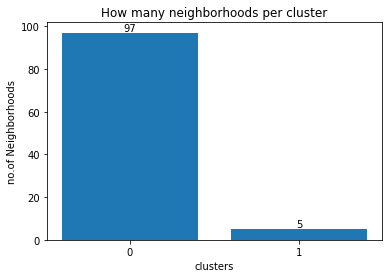

In [53]:
xs=np.array(clusters)
ys=np.array(cluster_length)
plt.bar(xs,ys)
for x,y in zip(xs,ys):
    plt.annotate('{}'.format(y),(x,y),textcoords='offset points',ha='center',xytext=(0,len(xs)))
plt.xlabel("clusters")
plt.ylabel("no.of Neighborhoods")
plt.title("How many neighborhoods per cluster")
plt.show()

In [54]:
ql=[la0['labels'],la1['labels']]

In [55]:
w=[]
for y in ql:
    w.append(np.mean(y))

In [56]:
w

[0.0, 1.0]

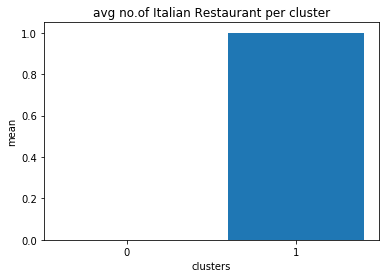

In [57]:
plt.bar(clusters,w)
plt.xlabel("clusters")
plt.ylabel("mean")
plt.title("avg no.of Italian Restaurant per cluster")
plt.show()

From above bar graph we can conclude that cluster 0 had no Italian Restaurants while cluster 1 had a few Italian Restaurants

In [58]:
la0.index

Int64Index([  1,   3,   4,   5,   7,  11,  13,  14,  16,  17,  18,  21,  27,
             28,  30,  31,  33,  34,  35,  36,  38,  41,  42,  43,  44,  45,
             56,  57,  58,  59,  60,  61,  64,  68,  72,  73,  74,  76,  78,
             79,  80,  83,  84,  86,  87,  90,  91,  92,  93,  94,  95,  99,
            100, 107, 108, 109, 110, 111, 112, 117, 118, 123, 125, 128, 134,
            135, 141, 149, 150, 152, 159, 163, 165, 169, 202, 204, 205, 210,
            226, 228, 235, 262, 268, 270, 280, 283, 287, 301, 303, 308, 309,
            313, 319, 336, 338, 346, 351],
           dtype='int64')

In [59]:
#bng_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
italian_clu = p
italian_clu = italian_clu.join(italian_df.set_index('Neighborhood'), on='Neighborhood')
italian_clu.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,venue,venue_categories,venue Latitude,venue longitude,labels,Italian Restaurant
0,Agram,45.813177,15.977048,Amélie,Dessert Shop,45.813842,15.979011,1,0.066667
1,Agram,45.813177,15.977048,Corner bar,Bar,45.812930,15.979440,1,0.066667
2,Agram,45.813177,15.977048,Trg bana Josipa Jelačića,Plaza,45.813032,15.976868,1,0.066667
3,Agram,45.813177,15.977048,Tržnica Dolac,Farmers Market,45.814070,15.977261,1,0.066667
4,Agram,45.813177,15.977048,Cremme Zagreb,Dessert Shop,45.814987,15.976296,1,0.066667


In [60]:
len(italian_clu[italian_clu['labels']==0])

454

In [61]:
len(italian_clu[italian_clu['labels']==1])

143

### Cluster 1 (red)

In [62]:
cluster1 = p
cluster1 = cluster1.join(la0.set_index('Neighborhood'), on='Neighborhood')
cluster1=cluster1.dropna()
cluster1['labels']=cluster1['labels'].astype(int)
cluster1

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,venue,venue_categories,venue Latitude,venue longitude,City,Latitude,Longitude,labels,Italian Restaurant
30,Amruthahalli,13.066513,77.596624,Reliance Fresh,Convenience Store,13.066264,77.596961,Bangalore,13.066513,77.596624,0,0.0
31,Amruthahalli,13.066513,77.596624,State Bank of India ATM,ATM,13.066130,77.598380,Bangalore,13.066513,77.596624,0,0.0
32,Amruthahalli,13.066513,77.596624,Shoba Hypermarket,Department Store,13.066882,77.595574,Bangalore,13.066513,77.596624,0,0.0
33,Amruthahalli,13.066513,77.596624,Sip N Crunch,Juice Bar,13.066003,77.597030,Bangalore,13.066513,77.596624,0,0.0
34,Amruthahalli,13.066513,77.596624,Bata,Shoe Store,13.065699,77.599402,Bangalore,13.066513,77.596624,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
592,Vidyanagara,13.018496,76.108893,Sunrise Cafe and Restaurant,Café,13.018644,76.109861,Bangalore,13.018496,76.108893,0,0.0
593,Vidyanagara,13.018496,76.108893,Apollo Pharmacy,Pharmacy,13.017034,76.107567,Bangalore,13.018496,76.108893,0,0.0
594,Vidyanagara,13.018496,76.108893,Harish Pani Puri Stall,Snack Place,13.015778,76.107274,Bangalore,13.018496,76.108893,0,0.0
595,Vidyanagara,13.018496,76.108893,shivanna kabab centre,Fried Chicken Joint,13.017279,76.105580,Bangalore,13.018496,76.108893,0,0.0


In [309]:
len(cluster1['venue_categories'].unique())

124

In [310]:
len(cluster1['venue'].unique())

386

In [63]:
cluster1[cluster1['venue_categories']=='Italian Restaurant'] # No italian restaurants in cluster 1

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,venue,venue_categories,venue Latitude,venue longitude,City,Latitude,Longitude,labels,Italian Restaurant


In [64]:
cluster1_neighborhoods=list(cluster1['Neighborhood'].unique())
cluster1_neighborhoods[0:5]

['Amruthahalli', 'Banaswadi', 'Bellandur', 'Bhattarahalli', 'Byatarayanapura']

In [65]:
len(cluster1_neighborhoods)

97

### Cluster 2 (blue)

In [69]:
cluster2 = p
cluster2 = cluster2.join(la1.set_index('Neighborhood'), on='Neighborhood')
cluster2=cluster2.dropna()
cluster2['labels']=cluster2['labels'].astype(int)
for i in cluster2.index:
    if cluster2.loc[i,'venue_categories']!='Italian Restaurant':
        cluster2.loc[i,'Italian Restaurant']=0.00000
cluster2

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,venue,venue_categories,venue Latitude,venue longitude,City,Latitude,Longitude,labels,Italian Restaurant
0,Agram,45.813177,15.977048,Amélie,Dessert Shop,45.813842,15.979011,Bangalore,45.813177,15.977048,1,0.0
1,Agram,45.813177,15.977048,Corner bar,Bar,45.812930,15.979440,Bangalore,45.813177,15.977048,1,0.0
2,Agram,45.813177,15.977048,Trg bana Josipa Jelačića,Plaza,45.813032,15.976868,Bangalore,45.813177,15.977048,1,0.0
3,Agram,45.813177,15.977048,Tržnica Dolac,Farmers Market,45.814070,15.977261,Bangalore,45.813177,15.977048,1,0.0
4,Agram,45.813177,15.977048,Cremme Zagreb,Dessert Shop,45.814987,15.976296,Bangalore,45.813177,15.977048,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
471,Begur,52.480709,13.451829,nahkauf,Supermarket,52.483850,13.447582,Bangalore,52.480709,13.451829,1,0.0
472,Begur,52.480709,13.451829,REWE,Supermarket,52.478638,13.451016,Bangalore,52.480709,13.451829,1,0.0
473,Begur,52.480709,13.451829,Hertzbergplatz,Park,52.477678,13.448273,Bangalore,52.480709,13.451829,1,0.0
474,Begur,52.480709,13.451829,Pizzeria Da Izzi,Pizza Place,52.479252,13.444877,Bangalore,52.480709,13.451829,1,0.0


In [70]:
cluster2[cluster2['venue_categories']=='Italian Restaurant']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,venue,venue_categories,venue Latitude,venue longitude,City,Latitude,Longitude,labels,Italian Restaurant
23,Agram,45.813177,15.977048,Boban,Italian Restaurant,45.811613,15.976522,Bangalore,45.813177,15.977048,1,0.066667
29,Agram,45.813177,15.977048,Carpaccio,Italian Restaurant,45.811286,15.974799,Bangalore,45.813177,15.977048,1,0.066667
81,Domlur,12.962467,77.638196,Spaghetti Kitchen,Italian Restaurant,12.964539,77.641657,Bangalore,12.962467,77.638196,1,0.047619
132,Indiranagar S.O (Bangalore),12.973291,77.640467,Chianti Ristorante & Wine Bar,Italian Restaurant,12.970167,77.640346,Bangalore,12.973291,77.640467,1,0.033333
220,Begur,52.480709,13.451829,Pipaso,Italian Restaurant,52.478816,13.445998,Bangalore,52.480709,13.451829,1,0.062500
298,Koramangala,12.934011,77.622230,Chianti,Italian Restaurant,12.933537,77.621862,Bangalore,12.934011,77.622230,1,0.033333
469,Begur,52.480709,13.451829,Pipaso,Italian Restaurant,52.478816,13.445998,Bangalore,52.480709,13.451829,1,0.062500


In [71]:
cluster2_neighborhoods=list(cluster2['Neighborhood'].unique())  #These are the areas that contain Italian Restaurants
cluster2_neighborhoods[:]

['Agram', 'Domlur', 'Indiranagar S.O (Bangalore)', 'Begur', 'Koramangala']

In [72]:
import math
def distance(lat1,lng1,lat2,lng2):
    #distance between two latitudes
    dl=(lat2-lat1)*(math.pi/180.0) # convert degrees into radians => multiple with 3.14/180 since math.pi=3.14
    #distance between longitudes
    dlng=(lng2-lng1)*(math.pi/180.0)
    #convert latitudes into radians
    lat1=lat1*(math.pi/180.0)
    lat2=lat2*(math.pi/180.0)
    #apply haversine formula
    a=pow(math.sin(dl/2),2)+(math.cos(lat1)*math.cos(lat2)*(pow(math.sin(dlng/2),2)))
    d=2*math.asin(math.sqrt(a))  #asin => arcsin i.e.., inverse sin function
    r=6371 #radius of a earch
    return d*r   # output return in kilometers(km)


#### Finding distance between bangalore center to cluster 1 Neighborhoods 

In [73]:
cluster_columns=[]
cluster_values=[]
cluster_dict=dict()
print("Calculating distance from center of bangalore to each Neighborhood",end=" ")
for nlat,nlng,neigh in zip(bng_data['Latitude'],bng_data['Longitude'],bng_data['Neighborhood']):
    print(".",end=" ")
    key=neigh
    cluster_val='{:.2f}'.format(distance(bng_lat,bng_lng,nlat,nlng))+' km'
    cluster_dict[key]=cluster_dict.get(key,cluster_val)
print('done')

Calculating distance from center of bangalore to each Neighborhood . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done


In [74]:
cluster_dist_df=pd.DataFrame(cluster_dict.items())
cluster_dist_df.columns=['Neighborhood','Dist_frm_center-neigh']
print("shape of a Dataframe:",cluster_dist_df.shape)
cluster_dist_df.head()

shape of a Dataframe: (328, 2)


,Neighborhood,Dist_frm_center-neigh
0,Agram,6790.05 km
1,Amruthahalli,10.56 km
2,Attur,177.64 km
3,Banaswadi,7.80 km
4,Bellandur,6565.97 km


In [313]:
cluster_dist_df.loc[20:30]

,Neighborhood,Dist_frm_center-neigh
20,Jakkur,11.96 km
21,Kadugodi,19.40 km
22,Kalkunte,206.74 km
23,Kannamangala,28.19 km
24,Kodigehalli,14.80 km
25,Kothanur,51.92 km
26,Krishnarajapuram,92.49 km
27,Kundalahalli,13.46 km
28,Lingarajapuram,5.74 km
29,Mahadevapura,199.45 km


### cluster 2

In [75]:
cluster2_neighborhoods

['Agram', 'Domlur', 'Indiranagar S.O (Bangalore)', 'Begur', 'Koramangala']

In [76]:
cluster2_neigh_dist_df=pd.DataFrame({'Neighborhood':cluster2_neighborhoods})
cluster2_neigh_dist_df=pd.merge(cluster2_neigh_dist_df,cluster_dist_df,on=['Neighborhood'],how='inner')
len(cluster2_neigh_dist_df)

5

In [77]:
cluster2_neigh_dist_df

,Neighborhood,Dist_frm_center-neigh
0,Agram,6790.05 km
1,Domlur,4.83 km
2,Indiranagar S.O (Bangalore),4.97 km
3,Begur,7127.08 km
4,Koramangala,5.14 km


#### let's explore each neighborhoods of cluster 2

In [78]:
final_clu2_df=pd.merge(cluster2_neigh_dist_df,cluster2,on=['Neighborhood'],how='inner')
len(final_clu2_df)

143

#### The latitude and longitude of Agram & Begur are not correct so we removing it

In [95]:
final_clu2_df=final_clu2_df[final_clu2_df['venue_categories']=='Italian Restaurant'].drop_duplicates(subset='venue',keep='first')
final_clu2_df.drop(['Latitude','Longitude'],axis=1,inplace=True)
final_clu2_df.set_index('Neighborhood',inplace=True) # setting neighborhood column as index
final_clu2_df

,Dist_frm_center-neigh,Neighborhood Latitude,Neighborhood Longitude,venue,venue_categories,venue Latitude,venue longitude,City,labels,Italian Restaurant
Neighborhood,,,,,,,,,,
Agram,6790.05 km,45.813177,15.977048,Boban,Italian Restaurant,45.811613,15.976522,Bangalore,1,0.066667
Agram,6790.05 km,45.813177,15.977048,Carpaccio,Italian Restaurant,45.811286,15.974799,Bangalore,1,0.066667
Domlur,4.83 km,12.962467,77.638196,Spaghetti Kitchen,Italian Restaurant,12.964539,77.641657,Bangalore,1,0.047619
Indiranagar S.O (Bangalore),4.97 km,12.973291,77.640467,Chianti Ristorante & Wine Bar,Italian Restaurant,12.970167,77.640346,Bangalore,1,0.033333
Begur,7127.08 km,52.480709,13.451829,Pipaso,Italian Restaurant,52.478816,13.445998,Bangalore,1,0.062500
Koramangala,5.14 km,12.934011,77.622230,Chianti,Italian Restaurant,12.933537,77.621862,Bangalore,1,0.033333


#### These are the final neighborhoods that are competitive to open a new Italian restaurants 

In [101]:
final_clu2_df=final_clu2_df.drop(['Agram','Begur'],axis=0)
final_clu2_df.reset_index(inplace=True)
final_clu2_df

,Neighborhood,Dist_frm_center-neigh,Neighborhood Latitude,Neighborhood Longitude,venue,venue_categories,venue Latitude,venue longitude,City,labels,Italian Restaurant
0,Domlur,4.83 km,12.962467,77.638196,Spaghetti Kitchen,Italian Restaurant,12.964539,77.641657,Bangalore,1,0.047619
1,Indiranagar S.O (Bangalore),4.97 km,12.973291,77.640467,Chianti Ristorante & Wine Bar,Italian Restaurant,12.970167,77.640346,Bangalore,1,0.033333
2,Koramangala,5.14 km,12.934011,77.622230,Chianti,Italian Restaurant,12.933537,77.621862,Bangalore,1,0.033333


In [97]:
cluster2_columns=[]
cluster2_values=[]
cluster2_dict=dict()
print("Calculating distance from center of Neighborhood to each venue",end=" ")
for nlat,nlng,vlat,vlng,neigh in zip(final_clu2_df['Neighborhood Latitude'],final_clu2_df['Neighborhood Longitude'],final_clu2_df['venue Latitude'],final_clu2_df['venue longitude'],final_clu2_df['venue']):
    print(".",end=" ")
    key=neigh
    cluster2_val='{:.2f}'.format(distance(nlat,nlng,vlat,vlng))+' km'
    cluster2_dict[key]=cluster2_dict.get(key,cluster2_val)
print('done')

Calculating distance from center of Neighborhood to each venue . . . done


In [99]:
cluster2_df=pd.DataFrame(cluster2_dict.items())
cluster2_df.columns=['venue','Dist_from_neigh-venue']
cluster2_df

,venue,Dist_from_neigh-venue
0,Spaghetti Kitchen,0.44 km
1,Chianti Ristorante & Wine Bar,0.35 km
2,Chianti,0.07 km


In [104]:
cluster_Italy=pd.merge(final_clu2_df,cluster2_df,on='venue',how='inner')
final_clu2_columns=['Neighborhood','Dist_frm_center-neigh','venue','Dist_from_neigh-venue']
cluster_Italy=cluster_Italy[final_clu2_columns]
cluster_Italy

,Neighborhood,Dist_frm_center-neigh,venue,Dist_from_neigh-venue
0,Domlur,4.83 km,Spaghetti Kitchen,0.44 km
1,Indiranagar S.O (Bangalore),4.97 km,Chianti Ristorante & Wine Bar,0.35 km
2,Koramangala,5.14 km,Chianti,0.07 km


By observing above data we can conclude that Italian restaurants are located within the radius of < 6 km from city center and less
than one kilometer from neighborhood

### cluster 1 

In [107]:
cluster1_neighborhoods[0:10]

['Amruthahalli',
 'Banaswadi',
 'Bellandur',
 'Bhattarahalli',
 'Byatarayanapura',
 'Doddanekkundi',
 'EPIP',
 'Fraser Town',
 'HighCourt',
 'Hoodi']

In [133]:
cluster1_dist_df=pd.DataFrame({'Neighborhood':cluster1_neighborhoods})
cluster1_dist_df=pd.merge(cluster1_dist_df,cluster_dist_df,on='Neighborhood',how='inner')
# let's take neighborhoods within the radius of 20 km from city center
dict_clu2=dict()
for i in range(len(cluster1_dist_df.Neighborhood)):
    dist=float(cluster1_dist_df.loc[i,'Dist_frm_center-neigh'].split('km')[0])
    if dist<=10.00:
        key=cluster1_dist_df.loc[i,'Neighborhood']
        dict_clu2[key]=dict_clu2.get(key,str(dist)+' '+'km')
cluster1_dist_df=pd.DataFrame(dict_clu2.items())
cluster1_dist_df.columns=['Neighborhood','Dist_frm_center-neigh']

In [137]:
cluster1_dist_df.sort_values(by='Dist_frm_center-neigh',ascending=0,inplace=True)
cluster1_dist_df=cluster1_dist_df.reset_index(drop=True)
cluster1_dist_df.head()

,Neighborhood,Dist_frm_center-neigh
0,Jalahalli H.O,9.71 km
1,Konanakunte,9.66 km
2,Peenya Dasarahalli,9.53 km
3,Horamavu,9.43 km
4,Nagarbhavi,9.43 km


In [147]:
len(cluster1_dist_df)

26

In [ ]:
we know the competitors locations are within the radius of < 6km,

In [138]:
final_clu1_df=pd.merge(cluster1_dist_df,cluster1,on=['Neighborhood'],how='inner')
final_clu1_df

,Neighborhood,Dist_frm_center-neigh,Neighborhood Latitude,Neighborhood Longitude,venue,venue_categories,venue Latitude,venue longitude,City,Latitude,Longitude,labels,Italian Restaurant
0,Jalahalli H.O,9.71 km,13.046453,77.548380,Kadamba Gardenia,Vegetarian / Vegan Restaurant,13.049061,77.548460,Bangalore,13.046453,77.548380,0,0.0
1,Jalahalli H.O,9.71 km,13.046453,77.548380,Kanti Sweets (Jalahalli),Fast Food Restaurant,13.048806,77.549669,Bangalore,13.046453,77.548380,0,0.0
2,Jalahalli H.O,9.71 km,13.046453,77.548380,D Needs,Shopping Mall,13.048883,77.549731,Bangalore,13.046453,77.548380,0,0.0
3,Jalahalli H.O,9.71 km,13.046453,77.548380,New Arya Bhavan,Indian Restaurant,13.049080,77.547295,Bangalore,13.046453,77.548380,0,0.0
4,Konanakunte,9.66 km,12.886018,77.579141,Kabab Mahal,Indian Restaurant,12.886661,77.582068,Bangalore,12.886018,77.579141,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Chickpet,1.77 km,12.968003,77.578642,Lakshmi Nataraj Refreshments,South Indian Restaurant,12.967476,77.579468,Bangalore,12.968003,77.578642,0,0.0
220,Chickpet,1.77 km,12.968003,77.578642,Nagarathpeth,Miscellaneous Shop,12.967582,77.579362,Bangalore,12.968003,77.578642,0,0.0
221,Chickpet,1.77 km,12.968003,77.578642,Taj Restaurant,Middle Eastern Restaurant,12.964279,77.578092,Bangalore,12.968003,77.578642,0,0.0
222,Chickpet,1.77 km,12.968003,77.578642,K.R Market,Market,12.963974,77.577728,Bangalore,12.968003,77.578642,0,0.0


In [149]:
cmpt_htls=final_clu1_df[final_clu1_df['venue_categories'].str.contains('Restaurant')]
cmpt_htls['Neighborhood'].unique()

array(['Jalahalli H.O', 'Konanakunte', 'Peenya Dasarahalli', 'Horamavu',
       'Nagarbhavi', 'Mallathahalli', 'Yelachenahalli', 'Chikkalasandra',
       'Mathikere', 'Nayandahalli', 'Banaswadi', 'Vimanapura', 'Msrit',
       'Basaveshwaranagar', 'Kathriguppe', 'Thippasandra',
       'Lingarajapuram', 'Vijayanagar S.O (Bangalore)', 'Jayanagar H.O',
       'Sadashivanagar', 'Rameshwara', 'Adugodi', 'Mavalli', 'Chickpet'],
      dtype=object)

In [269]:
trs=final_clu1_df
trs

,Neighborhood,Dist_frm_center-neigh,Neighborhood Latitude,Neighborhood Longitude,venue,venue_categories,venue Latitude,venue longitude,City,Latitude,Longitude,labels,Italian Restaurant
0,Jalahalli H.O,9.71 km,13.046453,77.548380,Kadamba Gardenia,Vegetarian / Vegan Restaurant,13.049061,77.548460,Bangalore,13.046453,77.548380,0,0.0
1,Jalahalli H.O,9.71 km,13.046453,77.548380,Kanti Sweets (Jalahalli),Fast Food Restaurant,13.048806,77.549669,Bangalore,13.046453,77.548380,0,0.0
2,Jalahalli H.O,9.71 km,13.046453,77.548380,D Needs,Shopping Mall,13.048883,77.549731,Bangalore,13.046453,77.548380,0,0.0
3,Jalahalli H.O,9.71 km,13.046453,77.548380,New Arya Bhavan,Indian Restaurant,13.049080,77.547295,Bangalore,13.046453,77.548380,0,0.0
4,Konanakunte,9.66 km,12.886018,77.579141,Kabab Mahal,Indian Restaurant,12.886661,77.582068,Bangalore,12.886018,77.579141,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Chickpet,1.77 km,12.968003,77.578642,Lakshmi Nataraj Refreshments,South Indian Restaurant,12.967476,77.579468,Bangalore,12.968003,77.578642,0,0.0
220,Chickpet,1.77 km,12.968003,77.578642,Nagarathpeth,Miscellaneous Shop,12.967582,77.579362,Bangalore,12.968003,77.578642,0,0.0
221,Chickpet,1.77 km,12.968003,77.578642,Taj Restaurant,Middle Eastern Restaurant,12.964279,77.578092,Bangalore,12.968003,77.578642,0,0.0
222,Chickpet,1.77 km,12.968003,77.578642,K.R Market,Market,12.963974,77.577728,Bangalore,12.968003,77.578642,0,0.0


In [272]:
res1_dict=dict()
for i in range(len(trs['Neighborhood'])):
    if 'Restaurant' in trs.loc[i,'venue_categories']:
        res1_dict[trs.loc[i,'Neighborhood']]=res1_dict.get(trs.loc[i,'Neighborhood'],0)+1  

In [279]:
res1_dict_df=pd.DataFrame(res1_dict.items())
res1_dict_df.columns=['Neighborhood','No.of any restaurants']
res1_dict_df

,Neighborhood,No.of any restaurants
0,Jalahalli H.O,3
1,Konanakunte,1
2,Peenya Dasarahalli,2
3,Horamavu,2
4,Nagarbhavi,1
5,Mallathahalli,6
6,Yelachenahalli,1
7,Chikkalasandra,3
8,Mathikere,2
9,Nayandahalli,1


In [280]:
res1_dict_df.groupby('No.of any restaurants').count()  #shows count of no.of different type of any restaurants

,Neighborhood
No.of any restaurants,
1,9
2,4
3,4
5,3
6,1
7,1
8,1
13,1


From above we can say that there are 9 Neighborhoods which contain only one any type of restaurant and no Italian Restaurants,
this depicts to choose best places for a new Italian Restaurants

In [285]:
cn_neigh=[]
for i in range(len(res1_dict_df['Neighborhood'])):
    if res1_dict_df.loc[i,'No.of any restaurants']==1:
        cn_neigh.append(res1_dict_df.loc[i,'Neighborhood'])

In [286]:
cn_neigh

['Konanakunte',
 'Nagarbhavi',
 'Yelachenahalli',
 'Nayandahalli',
 'Vimanapura',
 'Kathriguppe',
 'Lingarajapuram',
 'Vijayanagar S.O (Bangalore)',
 'Adugodi']

adding neighborhoods to the cn_niehg list that doesn't containing any other restaurants and Italay Restaurants

In [288]:
for i in list(final_clu1_df['Neighborhood'].unique()):
    if i not in cmpt_htls['Neighborhood'].unique():
        cn_neigh.append(i)

In [289]:
cn_neigh

['Konanakunte',
 'Nagarbhavi',
 'Yelachenahalli',
 'Nayandahalli',
 'Vimanapura',
 'Kathriguppe',
 'Lingarajapuram',
 'Vijayanagar S.O (Bangalore)',
 'Adugodi',
 'Deepanjalinagar',
 'Girinagar S.O (Bangalore)']

In [293]:
fnl_rcmd_df=pd.DataFrame({'Neighborhood':cn_neigh}) #converting list to a dataframe
fnl_rcmd_df

,Neighborhood
0,Konanakunte
1,Nagarbhavi
2,Yelachenahalli
3,Nayandahalli
4,Vimanapura
5,Kathriguppe
6,Lingarajapuram
7,Vijayanagar S.O (Bangalore)
8,Adugodi
9,Deepanjalinagar


In [294]:
fnl_rcmd_df=pd.merge(fnl_rcmd_df,cluster_dist_df,on='Neighborhood',how='inner')
fnl_rcmd_df

,Neighborhood,Dist_frm_center-neigh
0,Konanakunte,9.66 km
1,Nagarbhavi,9.43 km
2,Yelachenahalli,8.61 km
3,Nayandahalli,7.80 km
4,Vimanapura,7.54 km
5,Kathriguppe,6.23 km
6,Lingarajapuram,5.74 km
7,Vijayanagar S.O (Bangalore),5.29 km
8,Adugodi,3.63 km
9,Deepanjalinagar,6.71 km


In [305]:
fnl_rcmd_df=pd.merge(fnl_rcmd_df,bng_data,on='Neighborhood',how='inner')
fnl_rcmd_df=fnl_rcmd_df.sort_values('Dist_frm_center-neigh').reset_index(drop=True)
fnl_rcmd_df

,Neighborhood,Dist_frm_center-neigh,City,Latitude,Longitude
0,Adugodi,3.63 km,Bangalore,12.942847,77.610416
1,Vijayanagar S.O (Bangalore),5.29 km,Bangalore,12.971889,77.545789
2,Lingarajapuram,5.74 km,Bangalore,13.011768,77.627829
3,Kathriguppe,6.23 km,Bangalore,12.931193,77.554793
4,Girinagar S.O (Bangalore),6.46 km,Bangalore,12.940144,77.544500
5,Deepanjalinagar,6.71 km,Bangalore,12.950624,77.536554
6,Vimanapura,7.54 km,Bangalore,12.962180,77.663546
7,Nayandahalli,7.80 km,Bangalore,12.945401,77.527810
8,Yelachenahalli,8.61 km,Bangalore,12.897971,77.570085
9,Nagarbhavi,9.43 km,Bangalore,12.965101,77.507863


Let's visualize the recommended places for Italian Restaurants

In [300]:
rcmd_places=folium.Map(location=[bng_lat,bng_lng],zoom_start=11,radius=1000000)
for lat,lng,neigh in zip(fnl_rcmd_df['Latitude'],fnl_rcmd_df['Longitude'],fnl_rcmd_df['Neighborhood']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=neigh,
        fill=True,
        fill_color='orange',
        fill_opacity=0.7).add_to(rcmd_places)
rcmd_places

In [307]:
print("--------------------------")
print("Recommended Places")
print("--------------------------",end="\n")
for i in range(len(fnl_rcmd_df['Neighborhood'])):
    print("{}{} => {}".format(fnl_rcmd_df.loc[i,'Neighborhood'],' '*(30-len(fnl_rcmd_df.loc[i,'Neighborhood'])),fnl_rcmd_df.loc[i,'Dist_frm_center-neigh']))

--------------------------
Recommended Places
--------------------------
Adugodi                        => 3.63 km
Vijayanagar S.O (Bangalore)    => 5.29 km
Lingarajapuram                 => 5.74 km
Kathriguppe                    => 6.23 km
Girinagar S.O (Bangalore)      => 6.46 km
Deepanjalinagar                => 6.71 km
Vimanapura                     => 7.54 km
Nayandahalli                   => 7.80 km
Yelachenahalli                 => 8.61 km
Nagarbhavi                     => 9.43 km
Konanakunte                    => 9.66 km
